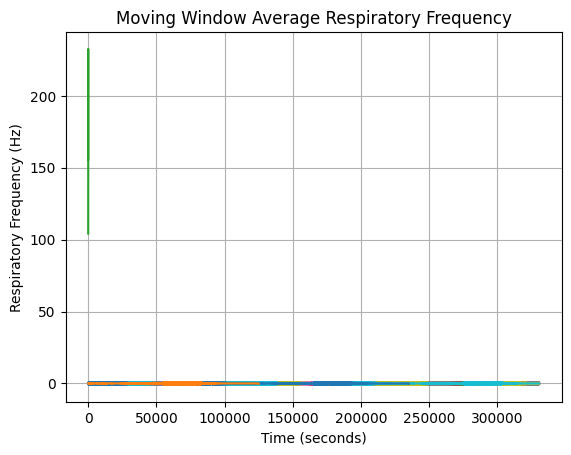

In [74]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import scipy

# Load the audio file
audio_file = 'test.mp3'
audio_data, sr = librosa.load(audio_file)

# Set the window size and overlap in seconds
window_size = 15
overlap = 5

# Calculate the number of samples in the window
window_samples = int(sr * window_size)
overlap_samples = int(sr * overlap)

# Calculate the number of windows in the audio
num_windows = len(audio_data) // overlap_samples

# Initialize arrays to store the respiratory frequency and time for each window
respiratory_frequencies = np.zeros(num_windows)
window_times = np.zeros(num_windows)

# Iterate over each window
for i in range(num_windows):
    # Calculate the start and end samples of the current window
    start = i * overlap_samples
    end = start + window_samples

    # Extract the current window
    window = audio_data[start:end]
    
    plt.plot(window)

    # Calculate the envelope of the window using Hilbert transform
    envelope = np.abs(hilbert(window))

    # Calculate the short-term Fourier transform (STFT) of the envelope
    stft = np.abs(librosa.stft(envelope))

    # Calculate the spectral centroid of the STFT
    spectral_centroids = librosa.feature.spectral_centroid(S=stft, sr=sr)

    # Find the index of the peak spectral centroid
    peak_index = np.argmax(spectral_centroids)

    # Calculate the respiratory frequency in Hz
    respiratory_frequency = spectral_centroids[0, peak_index] * sr / len(window)

    # Store the respiratory frequency and time for the current window
    respiratory_frequencies[i] = respiratory_frequency
    window_times[i] = start / sr

# Calculate the moving average of the respiratory frequency
window_size_sec = window_size - overlap
moving_average = np.convolve(respiratory_frequencies, np.ones(window_size_sec) / window_size_sec, mode='same')

# Create a time array for the moving average
moving_average_times = np.linspace(window_size_sec / 2, len(audio_data) / sr - window_size_sec / 2, len(moving_average))

# Plot the moving average calculated frequency vs time
plt.plot(moving_average_times, moving_average)
plt.xlabel('Time (seconds)')
plt.ylabel('Respiratory Frequency (Hz)')
plt.title('Moving Window Average Respiratory Frequency')
plt.grid(True)
plt.show()


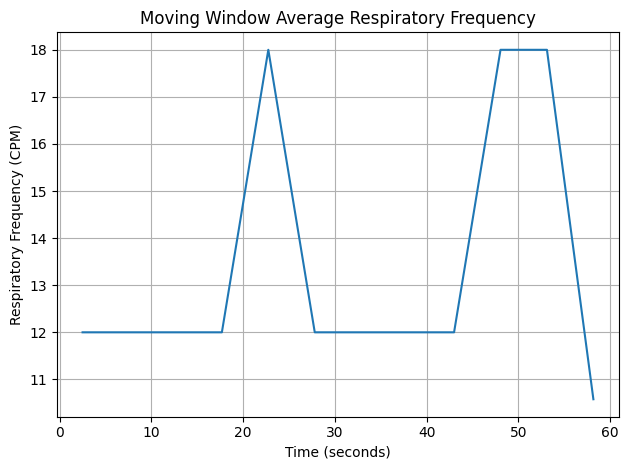

In [91]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy import interpolate
from scipy.signal import hilbert, butter, filtfilt


# Load the audio file
audio_file = 'test.mp3'
audio_data, sr = librosa.load(audio_file)

# Set the window size and overlap in seconds
window_size = 10
overlap = 5

# Calculate the number of samples in the window
window_samples  = int(sr * window_size)
overlap_samples = int(sr * overlap)

# Calculate the number of windows in the audio
num_windows = len(audio_data) // overlap_samples

# Calculate the moving average of the respiratory frequency
window_size_sec = window_size - overlap
moving_average = np.zeros(num_windows)

# Create an array to store the mosaic plots
mosaics = np.zeros((num_windows, window_samples))

cutoff_freq = 3  # in Hz

# Calculate the filter coefficients
b, a = butter(4, cutoff_freq / (sr / 2), btype='low')

# Iterate over each window
for i in range(num_windows):
    # Calculate the start and end samples of the current window
    start = i * overlap_samples
    end = start + window_samples

    # Extract the current window
    window = audio_data[start:end]

    # Calculate the envelope of the window using Hilbert transform
    envelope = np.abs(hilbert(window))
    
    # Set the lowpass filter parameters
   

    # Apply the lowpass filter to the signal
    envelope = filtfilt(b, a, envelope)
    
    # Apply UnivariateSpline interpolation with smoothing factor of 3000
    spline = interpolate.UnivariateSpline(np.arange(len(envelope)), envelope, s=2000)
    interpolated_envelope = spline(np.arange(len(envelope)))

    times = librosa.samples_to_time(np.arange(len(interpolated_envelope)), sr=sr)


    N = len(times)
    # sample spacing
    T = 1.0 / sr
    x = np.linspace(0.0, N*T, N, endpoint=False)
    yf = scipy.fft.fft(interpolated_envelope)
    xf = scipy.fft.fftfreq(N, T)[:N//2]

    freqs = xf
    start_idx = np.argmax(freqs >= 0.05)
    end_idx = np.argmax(freqs >= 0.6)

    # Extract the magnitude spectrum within the desired frequency range

    # Find the index of the largest magnitude within the frequency range
    #max_freq_idx = np.argmax(stft[start_idx:end_idx+1, :])
    max_amplitude_freq = freqs[start_idx:end_idx][np.argmax(np.abs(yf[start_idx:end_idx]))]

    # Get the corresponding frequency value
    #max_freq = freqs[start_idx:end_idx+1][max_freq_idx]
    # Store the respiratory frequency in the moving average array
    moving_average[i] = max_amplitude_freq*60

    # Store the windowed data in the mosaic array
    #mosaics[i] = window

    # # Plot the current windowed data
    # plt.figure()
    # plt.plot(interpolated_envelope)
    # plt.xlabel('Sample')
    # plt.ylabel('Amplitude')
    # plt.title(f'Window {i+1}')
    # plt.grid(True)

# Create a time array for the moving average
moving_average_times = np.linspace(window_size_sec / 2, len(audio_data) / sr - window_size_sec / 2, len(moving_average))

# Plot the moving average calculated frequency vs time
plt.figure()
plt.plot(moving_average_times, moving_average)
plt.xlabel('Time (seconds)')
plt.ylabel('Respiratory Frequency (CPM)')
plt.title('Moving Window Average Respiratory Frequency')
plt.grid(True)

# # Display the mosaic of windowed data
# fig, axes = plt.subplots(num_windows, 1, figsize=(8, 6))
# for i in range(num_windows):
#     axes[i].plot(mosaics[i])
#     axes[i].set_xlabel('Sample')
#     axes[i].set_ylabel('Amplitude')
#     axes[i].set_title(f'Window {i+1}')
#     axes[i].grid(True)

plt.tight_layout()
plt.show()


In [62]:
sr

22050

In [42]:
fouriers = np.empty([num_windows,stft.shape[0],stft.shape[1]])


In [66]:
y, sr = librosa.load('test.mp3')
S = np.abs(librosa.stft(y,win_length=int(sr * window_size)))
S


(1025, 2613)

In [58]:
y=envelope

# Step 2: Compute the magnitude spectrogram
magnitude_spectrogram = np.abs(stft)

# Step 4: Define the frequency range of interest in Hz
min_freq = 0.05  # Minimum frequency in Hz
max_freq = 60000 # Maximum frequency in Hz

# Step 5: Convert the frequency range to corresponding bins in the spectrogram
n_fft = stft.shape[0]
bin_min = int((min_freq * n_fft) / sr)
bin_max = int((max_freq * n_fft) / sr)

# Step 6: Slice the magnitude spectrogram to the frequency range of interest
spectrogram_range = magnitude_spectrogram[bin_min:bin_max, :]

# Step 7: Find the frequency bin with the highest amplitude within the range
if np.any(spectrogram_range):
    max_amplitude_bin = np.argmax(np.max(spectrogram_range, axis=1))
    # Step 8: Convert the frequency bin to the corresponding frequency in Hz
    max_amplitude_freq = (max_amplitude_bin * sr) / n_fft
    print("Frequency with the highest amplitude within the range:", max_amplitude_freq, "Hz")
else:
    print("No frequency bins found within the specified range.")


Frequency with the highest amplitude within the range: 0.0 Hz


In [71]:
librosa.stft(audio_data).shape

(1025, 2613)